In [19]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df=pd.read_csv(r"C:\Users\user\Downloads\data.csv")


In [21]:
df.isnull().sum()

F                          0
N                          0
Prprice per square foot    0
dtype: int64

In [22]:
df.describe()

,F,N,Prprice per square foot
count,100.000000,100.000000,100.000000
mean,0.550300,0.501700,554.214600
std,0.293841,0.307124,347.312796
min,0.010000,0.000000,42.080000
25%,0.300000,0.230000,278.172500
50%,0.570000,0.485000,514.285000
75%,0.822500,0.760000,751.752500
max,1.000000,0.990000,1563.820000


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='N'>

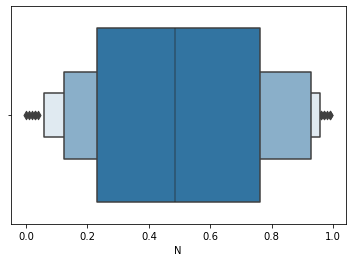

In [24]:
sns.boxenplot(df['N'])

(array([14., 18., 22., 19., 27.]),
 array([0.01 , 0.208, 0.406, 0.604, 0.802, 1.   ]),
 <BarContainer object of 5 artists>)

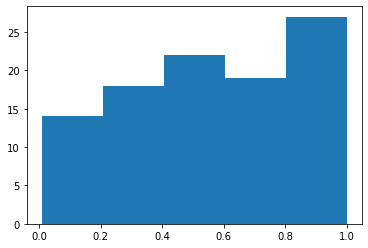

In [46]:
plt.hist(df['F'],bins=5)

(array([22., 15., 20., 19., 24.]),
 array([0.   , 0.198, 0.396, 0.594, 0.792, 0.99 ]),
 <BarContainer object of 5 artists>)

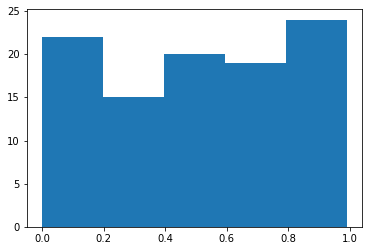

In [47]:
plt.hist(df['N'],bins=5)

In [25]:
from sklearn.preprocessing import StandardScaler
#we used standard scaler for scaling to minimum scale

In [26]:
sclr = StandardScaler()
scaled = sclr.fit_transform(df)


In [27]:
df1 = pd.DataFrame(scaled)
#coonverted to dataframe

In [28]:
df1.head()

,0,1,2
0,-0.377265,0.583471,-0.124647
1,1.503928,-0.889115,0.471350
2,0.990875,-0.692770,0.155381
3,-0.924521,-0.169184,-0.821290
4,-1.642794,1.074333,-0.764919


In [29]:
x = df1.iloc[:,:2].values
y = df1.iloc[:,-1].values

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0, test_size = 0.2)
#here we trained our data on train_test_split...our model is ready to work

In [31]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((80, 2), (20, 2), (80,), (20,))

In [32]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)


LinearRegression()

In [33]:
y_pred = reg.predict(x_test)

In [34]:
y_pred

array([-0.37075684, -1.43353291,  0.34046458, -1.39946387,  0.29374307,
       -0.9160151 ,  0.10036309,  0.05071943,  0.3560392 ,  0.41882197,
        0.57018377,  1.20807714,  1.44688172,  1.72705485, -0.08149832,
       -0.44765433,  1.25058194, -1.26059389,  0.97430189,  0.43504622])

Text(0.5, 1.0, 'Actual vs Predicted')

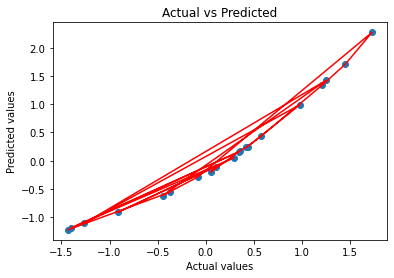

In [36]:
plt.scatter(y_pred,y_test)
plt.plot(y_pred,y_test,color = 'red')
plt.xlabel('Actual values')
plt.ylabel("Predicted values")
plt.title('Actual vs Predicted')

In [37]:
reg.predict([[0.44,0.68]])

array([0.72649571])

In [38]:
reg.predict([[0.43,0.06]])

array([0.35942899])

In [39]:
reg.predict([[0.90,0.94]])

array([1.21985185])

In [40]:
from sklearn.preprocessing import PolynomialFeatures

preg = PolynomialFeatures(degree = 4)

x_poly = preg.fit_transform(x_train)

lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly, y_train)
#Polynomial features are applied 

LinearRegression()

In [41]:
y_pred = lin_reg2.predict(preg.fit_transform(x_test))

y_pred

array([-0.5671409 , -1.22218853,  0.15876604, -1.17277595,  0.0372966 ,
       -0.91333257, -0.09478473, -0.19561572,  0.19346764,  0.22877167,
        0.4313899 ,  1.35730927,  1.72781526,  2.24761971, -0.26591288,
       -0.62054206,  1.4057029 , -1.11086416,  1.00438286,  0.23331786])

In [42]:
from sklearn import metrics

r2 = metrics.r2_score(y_test,y_pred)

mae = metrics.mean_absolute_error(y_test,y_pred)

mse = metrics.mean_squared_error(y_test,y_pred)

rmse = np.sqrt(mse)



In [43]:
print("Coeff of Determination ", r2)
print("Mean absolute error ",mae)
print("Mean squared error",mse)
print('root mean squared error',rmse)

Coeff of Determination  0.9997845266352733
Mean absolute error  0.01222880939989664
Mean squared error 0.00020067826345722883
root mean squared error 0.014166095561488665


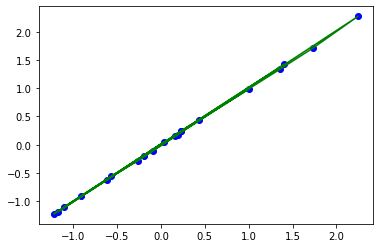

In [45]:
plt.scatter(y_pred,y_test,color='blue')
plt.plot(y_pred,y_test,color='green')

## Conclussion :- We plotted graph from that I concluded polynomial linear reg is suitable for this problem, and I also concluded that polynomial gives better result compare to multiple linear reg¶